## Task 3: Exploratory Data Analysis (EDA)

Description: Perform exploratory data analysis to
understand the underlying structure and trends in the
data.


Loading both the datasets raw data and preprocessed datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


raw_data = pd.read_csv('Stock_Prices_Data_Set.csv')
prep_data = pd.read_csv('cleaned_scaled_stock_prices.csv')

In [2]:
raw_data.tail(5)

,symbol,date,open,high,low,close,volume
497467,XYL,2017-12-29,68.53,68.80,67.92,68.20,1046677
497468,YUM,2017-12-29,82.64,82.71,81.59,81.61,1347613
497469,ZBH,2017-12-29,121.75,121.95,120.62,120.67,1023624
497470,ZION,2017-12-29,51.28,51.55,50.81,50.83,1261916
497471,ZTS,2017-12-29,72.55,72.76,72.04,72.04,1704122


In [3]:
prep_data.head()

,symbol,date,open,high,low,close,volume
0,1,2014-01-02,-1.019921,-1.010001,-1.015134,-1.014292,8998943
1,3,2014-01-02,0.071231,0.060759,0.075483,0.063546,58791957
2,2,2014-01-02,0.693568,0.704232,0.692347,0.680648,542711
3,4,2014-01-02,-0.476483,-0.481947,-0.478746,-0.479576,4569061
4,5,2014-01-02,-0.115061,-0.125396,-0.114667,-0.119818,1148391


- Compute summary statistics (mean, median, variance, etc.).

In [21]:
raw_data.describe().round(5)

,open,high,low,close,volume
count,497461.00000,497464.00000,497464.00000,497472.00000,4.974720e+05
mean,86.35227,87.13256,85.55247,86.36908,4.253611e+06
std,101.47123,102.31206,100.57096,101.47241,8.232139e+06
min,1.62000,1.69000,1.50000,1.59000,0.000000e+00
25%,41.69000,42.09000,41.28000,41.70375,1.080166e+06
50%,64.97000,65.56000,64.35370,64.98000,2.084896e+06
75%,98.41000,99.23000,97.58000,98.42000,4.271928e+06
max,2044.00000,2067.99000,2035.11000,2049.00000,6.182376e+08


In [20]:
prep_data.describe().round(5)

,symbol,open,high,low,close,volume
count,488266.00000,488266.00000,488266.00000,488266.00000,488266.00000,4.882660e+05
mean,251.78361,0.00000,0.00000,0.00000,0.00000,4.310121e+06
std,144.54513,1.00000,1.00000,1.00000,1.00000,8.296752e+06
min,0.00000,-1.49104,-1.49065,-1.49273,-1.49176,0.000000e+00
25%,127.00000,-0.69446,-0.69408,-0.69444,-0.69451,1.101972e+06
50%,254.00000,-0.23681,-0.23714,-0.23630,-0.23693,2.118090e+06
75%,376.00000,0.39724,0.39640,0.39780,0.39702,4.334079e+06
max,500.00000,5.01034,5.00336,5.01487,5.01000,6.182376e+08


- Visualize the data using histograms, scatter plots, and box plots.

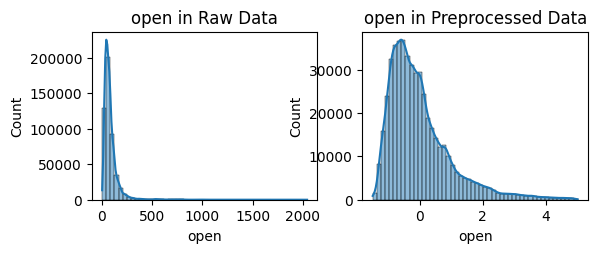

In [17]:
def comperson_plot(raw_feature, prep_feature, raw_title = None):
    
    plt.subplot(2, 2, 1)
    sns.histplot(raw_feature, bins=50, kde=True)
    plt.title(f'{raw_title} in Raw Data')
    plt.subplot(2, 2, 2)
    sns.histplot(prep_feature, bins=50, kde=True)
    plt.title(f'{raw_title} in Preprocessed Data')
    # plt.show()
comperson_plot(raw_data['open'], prep_data['open'], 'open')

It is show from the plot the data in the close column is skewed positively its infect mean > median > mode. 

and the outliers removed in the preprocessed data.

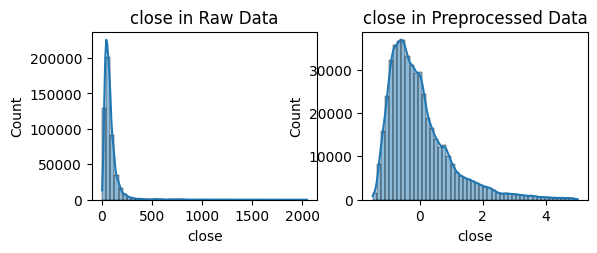

In [55]:
comperson_plot(raw_data['close'], prep_data['close'], 'close')

It is also postively skewed. And outliers removed in the preprocessed dataset.

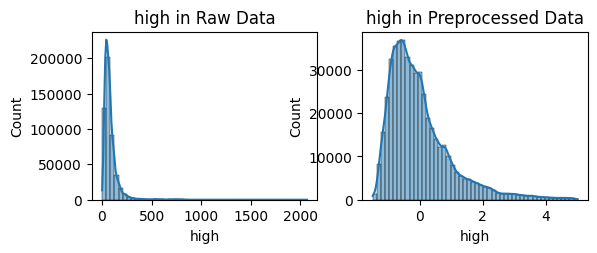

In [56]:
comperson_plot(raw_data['high'], prep_data['high'], 'high')

Fearure high is also postively skewed.

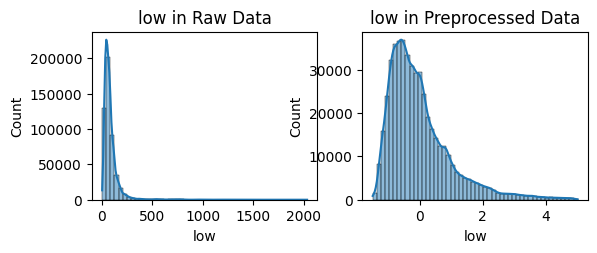

In [18]:
comperson_plot(raw_data['low'], prep_data['low'], 'low')

Feature low is also postively skewed. 

Higest five stocks flucatuation overtime

In [90]:
raw_data['symbol'].value_counts().head(5)

symbol
YUM     1007
XYL     1007
XRX     1007
XRAY    1007
XOM     1007
Name: count, dtype: int64

In [91]:
# making YUM as dataset
yum_data = raw_data[raw_data['symbol'] == 'YUM']
XYL_data = raw_data[raw_data['symbol'] == 'XYL']
XRX_data = raw_data[raw_data['symbol'] == 'XRX']
XRAY_data = raw_data[raw_data['symbol'] == 'XRAY']
XOM_data = raw_data[raw_data['symbol'] == 'XOM']

Text(0.5, 1.0, 'YUM Stock Price Over Time')

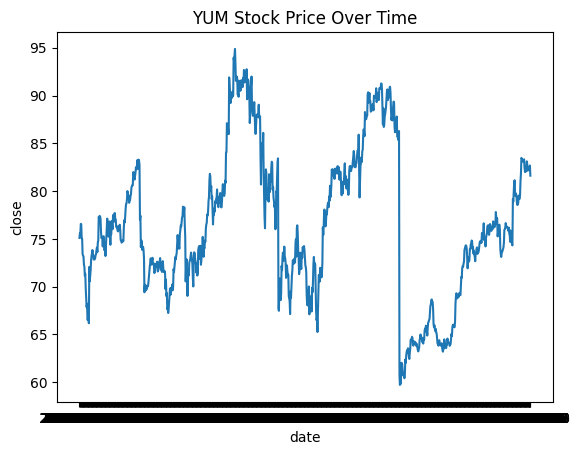

In [92]:
# Flucatuation of YUM stock over time
sns.lineplot(data=yum_data, x='date', y='close')
plt.title('YUM Stock Price Over Time')

You can see there is a huge flucatuation in YUM stock price over time.

Text(0.5, 1.0, 'XYL Stock Price Over Time')

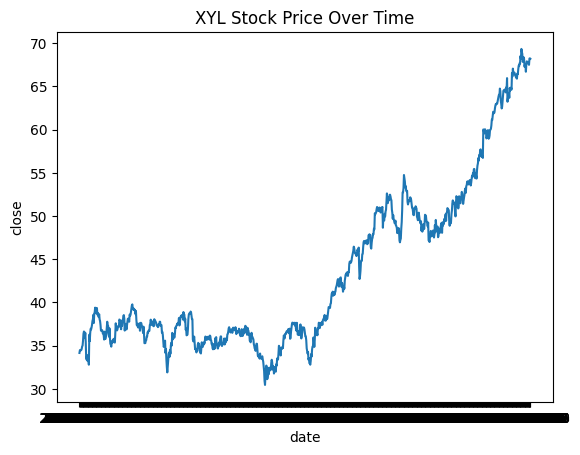

In [93]:
# Flucatuation of XYL stock over time
sns.lineplot(data=XYL_data, x='date', y='close')
plt.title('XYL Stock Price Over Time')

The closing prices of XYL have exclusively increase over the time period.

Text(0.5, 1.0, 'XRX Stock Price Over Time')

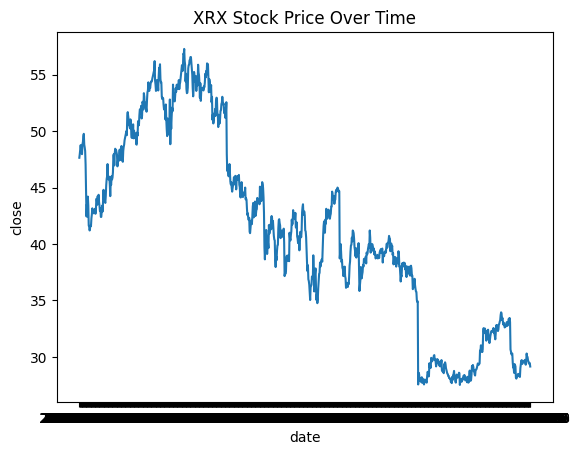

In [94]:
# Flucatuation of XRX stock over time
sns.lineplot(data=XRX_data, x='date', y='close')
plt.title('XRX Stock Price Over Time')

There is a deadly fall in the prices of XRX stock.

Text(0.5, 1.0, 'XRAY Stock Price Over Time')

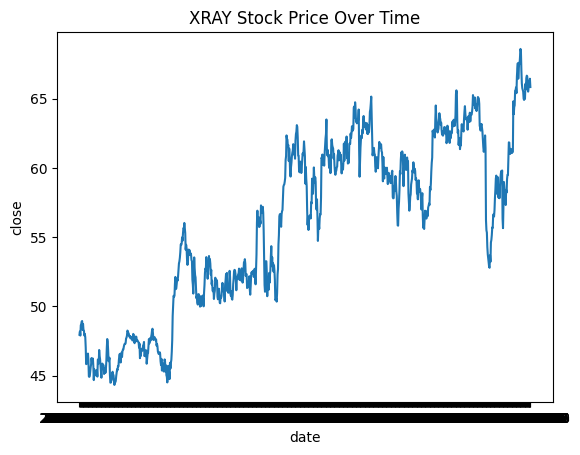

In [95]:
# Flucatuation of XRAY stock over time
sns.lineplot(data=XRAY_data, x='date', y='close')
plt.title('XRAY Stock Price Over Time')


In XRAY stock there is also a very good increase in prices.


Text(0.5, 1.0, 'XOM Stock Price Over Time')

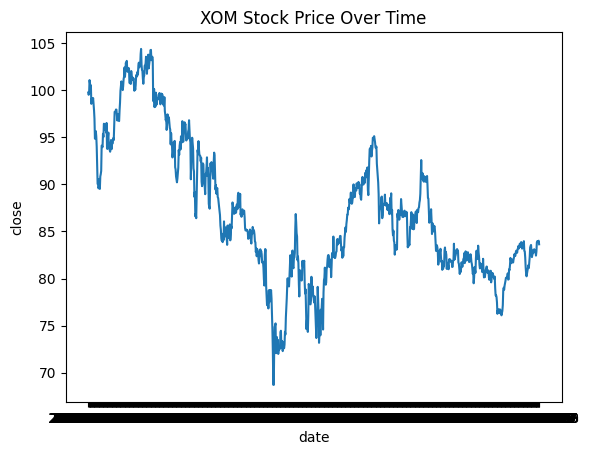

In [96]:
# Flucatuation of XOM stock over time
sns.lineplot(data=XOM_data, x='date', y='close')
plt.title('XOM Stock Price Over Time')


XOM is also a very fluctuated stock in the given period.

- Identify correlations between numerical features using a correlation matrix.

Text(0.5, 1.0, 'Correlation Heatmap')

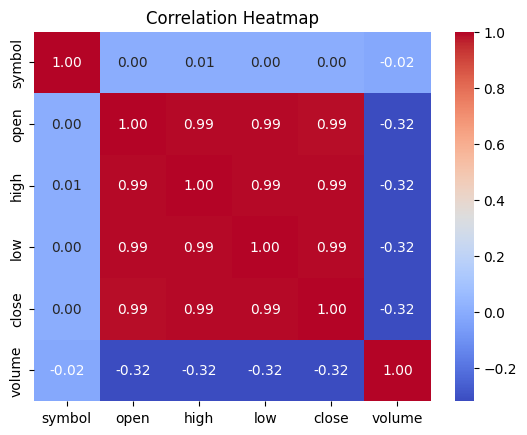

In [16]:
df_without_datetime = prep_data.drop(columns=['date'])
plt.Figure(figsize=(20, 10))
sns.heatmap(df_without_datetime.corr(method='kendall'), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')

The data is very linear in Open, High, low and close but less linear in the symbol and volume as well.

- Generate a report summarizing insights from the EDA.


# Exploratory Data Analysis (EDA) Report

## Description
Performing exploratory data analysis (EDA) to understand the underlying structure and trends in the dataset.

## Data Loading
Both the raw and preprocessed datasets were loaded for analysis.

## Summary Statistics
Computed summary statistics including:
- Mean
- Median
- Variance

## Data Visualization
Various plots were created to visualize the dataset:
- **Histograms**: Showed the distribution of data.
- **Scatter Plots**: Helped identify relationships between variables.
- **Box Plots**: Identified the presence of outliers.

## Skewness in Data
From the visualizations, the **Close** column in the dataset is positively skewed, as indicated by:
> Mean > Median > Mode

Outliers were removed in the preprocessed dataset, but it still remained positively skewed. Similar positive skewness was observed in the **Low, High, Open, and Close** features in both raw and preprocessed datasets.

## Stock Price Fluctuations
The highest five stock fluctuations over time were analyzed:
- **YUM**: Exhibited huge fluctuations in stock price.
- **XYL**: The closing prices showed an exclusive increase over time.
- **XRX**: Experienced a drastic decline in prices.
- **XRAY**: Demonstrated a significant increase in stock prices.
- **XOM**: Highly fluctuating stock during the given period.

## Correlation Analysis
A **correlation matrix** was used to identify relationships between numerical features:
- Strong linear relationships observed in **Open, High, Low, and Close** prices.
- Weak linearity detected in **Symbol and Volume**.

---




- Tools: Python, pandas, matplotlib, seaborn.
